## Driving Patterns 2015-2019: $d$
We assume that the car drives from 7:00 to 9:00 and from 17:00 to 19:00 from Monday to Friday. On Saturday, the car drives between 10:00 and 12:00. On Sundays and bank holidays, it is stationary. Furthermore, we assume that the car is connected to a bidirectional charging station, whenever it is not driving. This is the case during 87% of the time. We assume an energy consumption of 0.2kWh/km for a yearly mileage of 10,000km.

In [1]:
import pandas as pd
import numpy as np
import holidays
from datetime import datetime, timedelta

In [4]:
t = pd.date_range('01-01-2015 00:00:00', '12-31-2019 23:30:00', freq='30min')

In [9]:
Nyrs = 5               # number of years
mileage_yr = 10e3     # in kilometers
kWh_per_km = 0.2      # energy consumption per km
dt = 0.5
d = []
for k in range(len(t)):
    if t[k].date() in holidays.FRA(prov = 'Métropole'):
        d_new = 0
    elif t[k].weekday() == 6:
        d_new = 0
    elif t[k].weekday() == 5:
        if t[k].hour in [10, 11]:
            d_new = 1
        else:
            d_new = 0
    else:
        if t[k].hour in [7, 8, 17, 18]:
            d_new = 1
        else:
            d_new = 0
    d.append(d_new)
d = np.array(d)
s = 1 - d
d = d*Nyrs*mileage_yr*kWh_per_km/sum(d*dt)

In [6]:
df = pd.DataFrame(data = {'d':d, 's':s}, index=t)

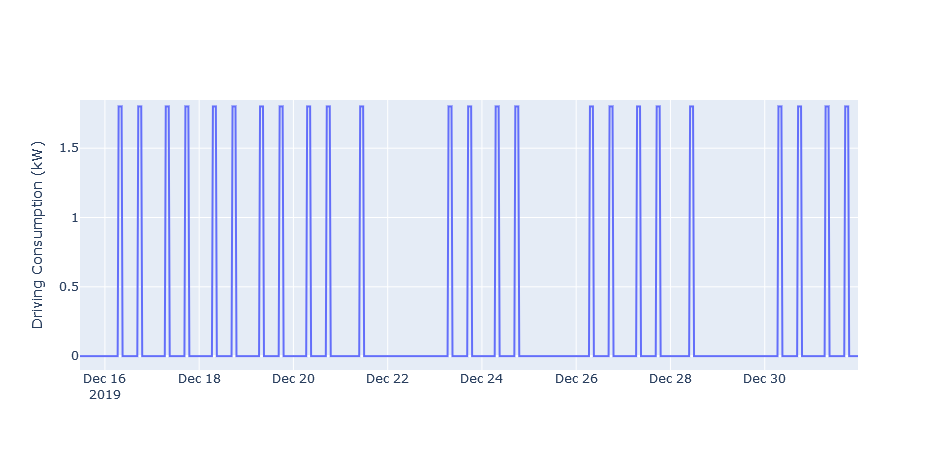

In [7]:
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)
plotly.offline.iplot({
    "data": [go.Scatter(x=df.index, y=df['d'])],
    "layout": go.Layout(yaxis=dict(title="Driving Consumption (kW)"))
})

Save data

In [12]:
df.to_hdf('ds.h5', key='df')

Total yearly energy consumption for driving in kWh

In [10]:
df.d.sum()/Nyrs*dt

1999.9999999999995

Percentage of time connected to the power grid

In [11]:
df.s.mean()

0.873311427528295